In [2]:
!pip install numpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [1]:
!pip install pandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
!pip install scikit-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [4]:
!pip install matplotlib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [5]:
!pip install pickle-mixin

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for pickle-mixin: filename=pickle_mixin-1.0.2-py3-none-any.whl size=6008 sha256=a607ed0bbb430d8bbc8a337acb0cb4935e29adbd2c417294e4d49736298261a9
  Stored in directory: /root/.cache/pip/wheels/d0/70/0b/673e09a7ed429660d22352a1b117b4f616a8fc054bdd7eb157
Successfully built pickle-mixin


In [6]:
!pip install seaborn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [7]:
!pip install imblearn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [8]:
!pip install pandas-profiling

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [9]:
!pip install Flask

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [10]:
import warnings
warnings.filterwarnings("always")
warnings.filterwarnings("ignore")

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
import pandas_profiling as pdp

In [12]:
%matplotlib inline
style.use('fivethirtyeight')
sns.set(style='whitegrid',color_codes=True)


In [13]:
!pip install catboost


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 76.6 MB 1.1 MB/s 


In [14]:
from sklearn.linear_model import LogisticRegression 
from sklearn.svm import LinearSVC, SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
import xgboost as xgb
import lightgbm as lgbm
import catboost as cb
from sklearn.ensemble import AdaBoostClassifier

In [15]:
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

In [16]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler, LabelEncoder


In [17]:
from sklearn.metrics import mean_squared_log_error,mean_squared_error, r2_score,mean_absolute_error # for
from sklearn.metrics import accuracy_score, precision_score,recall_score,f1_score

In [18]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score


In [19]:
df = pd.read_csv(r"/healthcare-dataset-stroke-data[2].csv")
df.head()


,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [20]:
df.shape


(5110, 12)

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


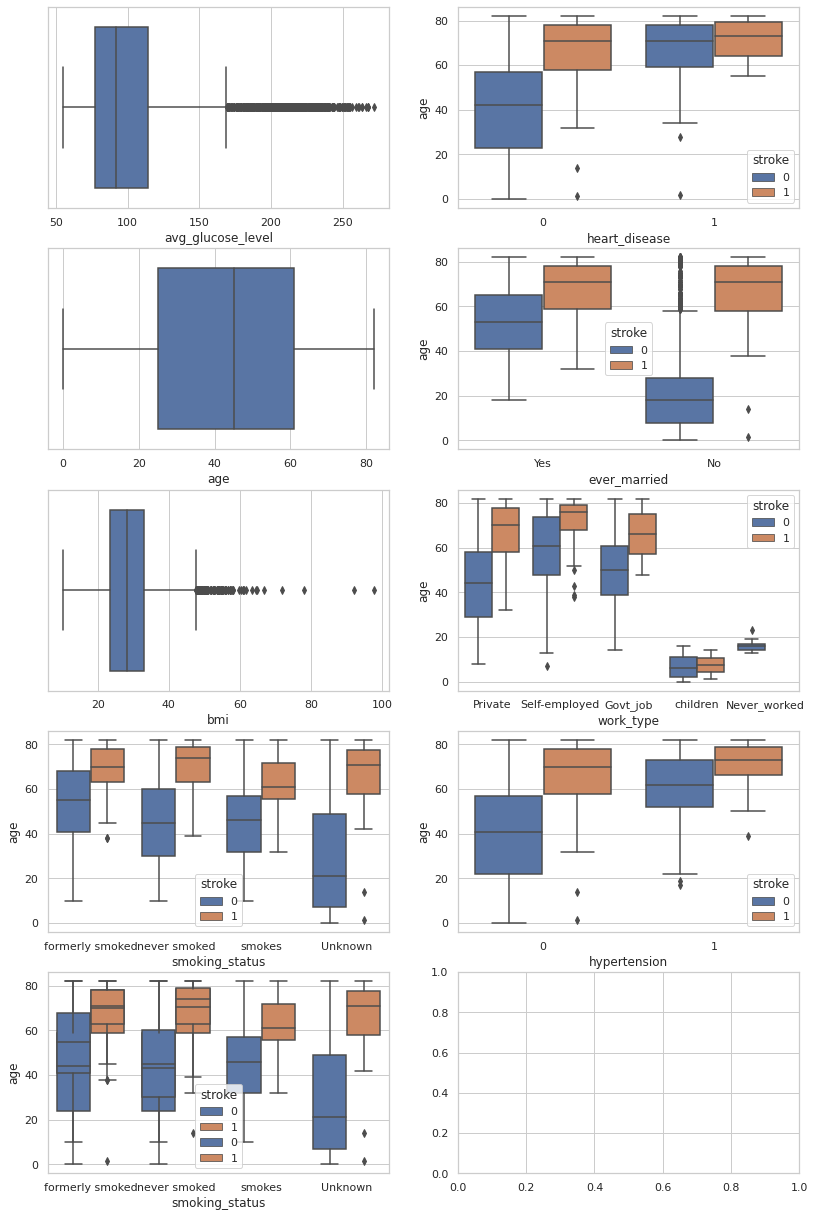

In [22]:
fig, axes = plt.subplots(nrows = 5, ncols = 2, figsize = (12, 20))
sns.boxplot(x = 'avg_glucose_level', data = df, ax=axes[0][0])
sns.boxplot(x = 'age', data = df, ax=axes[1][0])
sns.boxplot(x = 'bmi', data = df, ax=axes[2][0])
sns.boxplot(x = 'smoking_status', y = 'age', hue = 'stroke', data = df, ax=axes[3][0])
sns.boxplot(x = 'hypertension', y = 'age', hue = 'stroke', data = df, ax=axes[3][1])
sns.boxplot(x = 'heart_disease', y = 'age', hue = 'stroke', data = df, ax=axes[0][1])
sns.boxplot(x = 'ever_married',y = 'age', hue = 'stroke', data = df, ax = axes[1][1])
sns.boxplot(x = 'work_type',y = 'age', hue = 'stroke', data = df, ax = axes[2][1])
sns.boxplot(x = 'Residence_type',y = 'age', hue = 'stroke', data = df, ax = axes[4][0])  
sns.boxplot(x = 'smoking_status',y = 'age', hue = 'stroke', data = df, ax = axes[4][0])
 

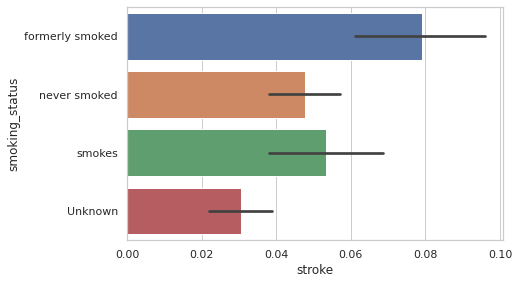

In [23]:
sns.barplot(x = 'stroke', y = 'smoking_status', data = df)

In [24]:
replace_values = {'unknow':'never smoked'}
df = df.replace({'smoking_status':replace_values})
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


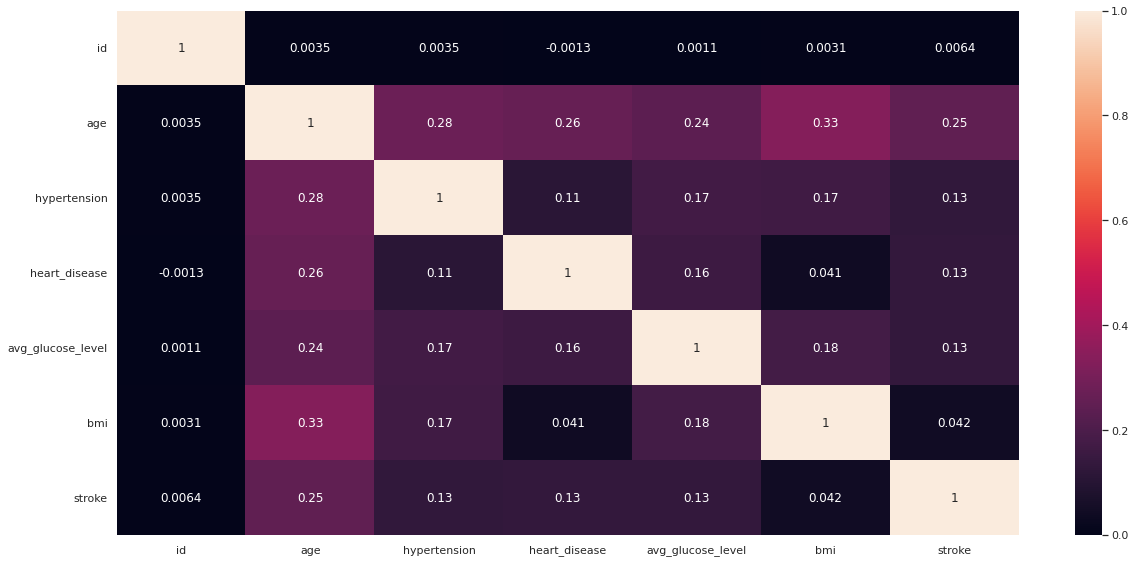

In [25]:
plt.figure(figsize = (18,9))
sns.heatmap(df.corr(),annot = True)
plt.show()

In [26]:
df.describe()


,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [27]:
df = df.drop('id',axis = 1)
df.shape

(5110, 11)

In [28]:
df.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [29]:
df.dropna(inplace=True)
df.isnull().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [ ]:
def remove_outliers (data):
   arr=[]
#print(max(list(data)))
   q1=np.percentile(data,25)
   q3=np.percentile(data,75)
   iqr=q3-q1
   mi=q1-(1.5*iqr)
   ma=q3+(1.5*iqr)
#print(mi,ma)
   for i in list(data):
      if i<mi:
         i=mi
         arr.append(i)
      elif i>ma:
           i=ma
           arr.append(i)
      else:
           arr.append(i)
#print (max(arr))
   return arr

In [ ]:
df['bmi'] = remove_outliers (df['bmi'])
df['avg_glucose_level']= remove_outliers (df['avg_glucose_level'])
print('Outliers successfully removed')

Outliers successfully removed


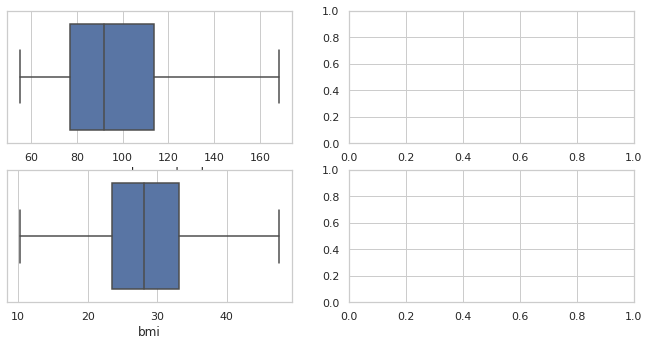

In [ ]:
fig, axes = plt.subplots(nrows = 2, ncols = 2, figsize = (10, 5))
sns.boxplot(x = 'bmi', data
= df, ax=axes[1][0])
sns.boxplot(x= 'avg_glucose_level', data = df, ax=axes[0][0])

In [ ]:
for i in ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']: 
  print(df[i].unique())

['Male' 'Female' 'Other']
['Yes' 'No']
['Private' 'Self-employed' 'Govt_job' 'children' 'Never_worked']
['Urban' 'Rural']
['formerly smoked' 'never smoked' 'smokes' 'Unknown']


In [ ]:
from sklearn.preprocessing import LabelEncoder
le1 = LabelEncoder()
le2 = LabelEncoder()
df['Residence_type'] = le1.fit_transform(df[ 'Residence_type'])
df['ever_married'] = le2.fit_transform(df['ever_married'])

In [ ]:
import joblib
joblib.dump(le1,"res_transform")
joblib.dump(1e2, "mar_transform")

['mar_transform']

In [ ]:
df.shape


(4909, 11)

In [ ]:
df.iloc[0,:]

gender                          Male
age                             67.0
hypertension                       0
heart_disease                      1
ever_married                       1
work_type                    Private
Residence_type                     1
avg_glucose_level             168.32
bmi                             36.6
smoking_status       formerly smoked
stroke                             1
Name: 0, dtype: object

In [ ]:
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,1,Private,1,168.32,36.6,formerly smoked,1
2,Male,80.0,0,1,1,Private,0,105.92,32.5,never smoked,1
3,Female,49.0,0,0,1,Private,1,168.32,34.4,smokes,1
4,Female,79.0,1,0,1,Self-employed,0,168.32,24.0,never smoked,1
5,Male,81.0,0,0,1,Private,1,168.32,29.0,formerly smoked,1


In [ ]:
X = df.iloc[:,0:10].values
y = df.iloc[:,10].values

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer([("onehot",OneHotEncoder (drop='first'),[0,5,9])],remainder="passthrough") 
X=ct.fit_transform(X)

In [ ]:
joblib.dump(ct, "column")

['column']

In [ ]:
X

array([[1.0, 0.0, 0.0, ..., 1, 168.32, 36.6],
       [1.0, 0.0, 0.0, ..., 0, 105.92, 32.5],
       [0.0, 0.0, 0.0, ..., 1, 168.32, 34.4],
       ...,
       [0.0, 0.0, 0.0, ..., 0, 82.99, 30.6],
       [1.0, 0.0, 0.0, ..., 0, 166.29, 25.6],
       [0.0, 0.0, 0.0, ..., 1, 85.28, 26.2]], dtype=object)

In [ ]:
X[0]

array([1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 67.0, 0, 1, 1, 1,
       168.32, 36.6], dtype=object)

In [ ]:
X.shape

(4909, 16)

In [ ]:
y.shape

(4909,)

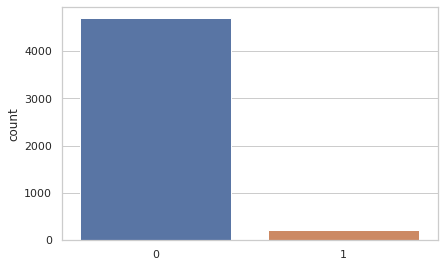

In [ ]:
sns.countplot(y)


In [ ]:
from imblearn.over_sampling import SMOTE
sm = SMOTE()
X_res, y_res = sm.fit_resample(X, y)
print("Before OverSampling, counts of label '1': {}".format(sum(y==1))) 
print("Before OverSampling, counts of label '0': {} \n".format(sum(y==0)))
print('After OverSampling, the shape of train_X: {}'.format(X_res.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_res.shape))
print("After OverSampling, counts of label '1': {}".format(sum(y_res==1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_res==0)))

Before OverSampling, counts of label '1': 209
Before OverSampling, counts of label '0': 4700 

After OverSampling, the shape of train_X: (9400, 16)
After OverSampling, the shape of train_y: (9400,) 

After OverSampling, counts of label '1': 4700
After OverSampling, counts of label '0': 4700


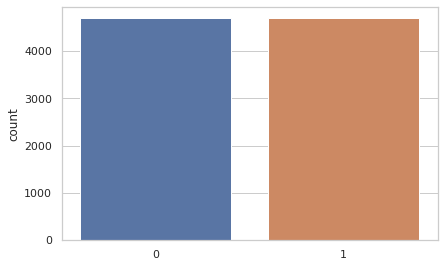

In [ ]:
sns.countplot(y_res)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X_res, y_res, test_size=0.2, random_state=42)

In [ ]:
dtc = DecisionTreeClassifier()
dtc.fit(X_train,y_train) 
dtc_pred = dtc.predict(X_test)
print('****Decision Tree Model Results****')
print(confusion_matrix(dtc_pred, y_test))
print(classification_report(dtc_pred, y_test))

****Decision Tree Model Results****
[[880  44]
 [ 42 914]]
              precision    recall  f1-score   support

           0       0.95      0.95      0.95       924
           1       0.95      0.96      0.96       956

    accuracy                           0.95      1880
   macro avg       0.95      0.95      0.95      1880
weighted avg       0.95      0.95      0.95      1880



In [ ]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)
print('*** Random Forest***')
print(confusion_matrix(rf_pred, y_test))
print(classification_report(rf_pred, y_test))

*** Random Forest***
[[909  47]
 [ 13 911]]
              precision    recall  f1-score   support

           0       0.99      0.95      0.97       956
           1       0.95      0.99      0.97       924

    accuracy                           0.97      1880
   macro avg       0.97      0.97      0.97      1880
weighted avg       0.97      0.97      0.97      1880



In [ ]:
lr = LogisticRegression()
lr.fit(X_train, y_train)
lr_pred = lr.predict(X_test)
print(confusion_matrix(lr_pred, y_test))
print('** Logistic Regression***')
print(classification_report(lr_pred, y_test))

[[698 187]
 [224 771]]
** Logistic Regression***
              precision    recall  f1-score   support

           0       0.76      0.79      0.77       885
           1       0.80      0.77      0.79       995

    accuracy                           0.78      1880
   macro avg       0.78      0.78      0.78      1880
weighted avg       0.78      0.78      0.78      1880



In [ ]:
svc = SVC()
svc.fit(X_train, y_train)
svc_pred = svc.predict(X_test)
print('***Support vector classifier***')
print(confusion_matrix(svc_pred, y_test))
print(classification_report(svc_pred, y_test))

***Support vector classifier***
[[658 170]
 [264 788]]
              precision    recall  f1-score   support

           0       0.71      0.79      0.75       828
           1       0.82      0.75      0.78      1052

    accuracy                           0.77      1880
   macro avg       0.77      0.77      0.77      1880
weighted avg       0.77      0.77      0.77      1880



In [ ]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
knn_pred = knn.predict(X_test)
print('***K-Nearest Neighbours***')
print(confusion_matrix(knn_pred, y_test))
print(classification_report(knn_pred, y_test))

***K-Nearest Neighbours***
[[762  23]
 [160 935]]
              precision    recall  f1-score   support

           0       0.83      0.97      0.89       785
           1       0.98      0.85      0.91      1095

    accuracy                           0.90      1880
   macro avg       0.90      0.91      0.90      1880
weighted avg       0.91      0.90      0.90      1880



In [ ]:
cross_valid_scores = {}

In [ ]:
%%time
parameters = {
     "max_depth": [3, 5, 7, 9, 11, 13],
}
model_dtc = DecisionTreeClassifier(
     random_state=42, 
     class_weight='balanced',
)
model_dtc = GridSearchCV(
     model_dtc,
     parameters,
     cv=5,
)
model_dtc.fit(X_train, y_train)
model_dtc_pred = model_dtc.predict(X_test)
print('** Applying Grid Search to Decision tree**')

** Applying Grid Search to Decision tree**
CPU times: user 708 ms, sys: 11.8 ms, total: 720 ms
Wall time: 719 ms


In [ ]:
print('** Applying Grid Search to Decision tree***')
print(classification_report(model_dtc_pred, y_test))
print(f'Best parameters {model_dtc.best_params_}') 
print(
f'Mean cross-validated accuracy score of the best_estimator: ' + \
f'{model_dtc.best_score_:.3f}'
)
cross_valid_scores['desicion_tree'] = model_dtc.best_score_ 
print('-----')

** Applying Grid Search to Decision tree***
              precision    recall  f1-score   support

           0       0.96      0.94      0.95       939
           1       0.95      0.96      0.95       941

    accuracy                           0.95      1880
   macro avg       0.95      0.95      0.95      1880
weighted avg       0.95      0.95      0.95      1880

Best parameters {'max_depth': 13}
Mean cross-validated accuracy score of the best_estimator: 0.947
-----


In [ ]:
parameters = {
     "n_estimators": [5, 10, 15, 20, 25],
     "max_depth": [3, 5, 7, 9, 11, 13],
}
model_rf = RandomForestClassifier(
      random_state=42,
      class_weight='balanced',
)
model_rf = GridSearchCV( 
  model_rf,
  parameters,
  cv=5,
)
model_rf.fit(X_train, y_train) 
model_rf_pred = model_rf.predict(X_test) 
print('*** Applying Grid Search to Random Forest**') 
print(classification_report(model_rf_pred, y_test)) 
print(f'Best parameters {model_rf.best_params_}')
print(
      f'Mean cross-validated accuracy score of the best_estimator: '+ \
      f'{model_rf.best_score_:.3f}'
 )
cross_valid_scores['random_forest'] = model_rf.best_score_

*** Applying Grid Search to Random Forest**
              precision    recall  f1-score   support

           0       0.99      0.95      0.97       963
           1       0.95      0.99      0.97       917

    accuracy                           0.97      1880
   macro avg       0.97      0.97      0.97      1880
weighted avg       0.97      0.97      0.97      1880

Best parameters {'max_depth': 13, 'n_estimators': 25}
Mean cross-validated accuracy score of the best_estimator: 0.973


In [ ]:
import joblib
joblib.dump(model_rf,"model")

['model']